<a href="https://colab.research.google.com/github/PatluriVishal/Machine-Learning-projects/blob/main/big_mart_sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [163]:
#Importing the Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [164]:
#Data collection and processing(LOading the data set from given .csv file to pandas frame )
big_mart_data = pd.read_csv('/content/Train.csv')

In [165]:
# first 5 rows of the dataframe
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [166]:
#number of the data points and features needed for building our model
big_mart_data.shape

(8523, 12)

In [ ]:
#dataset information
big_mart_data.info()


Categorical Items
-Item_Identifier             
 1   Item_Weight               
 2   Item_Fat_Content           
 3   Item_Visibility            
 4   Item_Type                  
 5   Item_MRP                   
 6   Outlet_Identifier          
 7   Outlet_Establishment_Year  
 8   Outlet_Size                
 9   Outlet_Location_Type       
 10  Outlet_Type                
 11  Item_Outlet_Sales

In [ ]:
#checking for the missing values
big_mart_data.isnull().sum()


In [171]:
big_mart_data['Item_Weight'].mean()

12.857645184135976

Handling the missing values of the given data set
-----Mean-Average Value
--------Mode-The most Repetative value.


In [172]:
big_mart_data['Item_Weight'].fillna(big_mart_data['Item_Weight'].mean(), inplace=True)

In [ ]:
big_mart_data['Outlet_Size'].mode()

In [179]:
#We are finding the mode of outlet size based on the outlet type
mode_of_Outlet_size = big_mart_data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))


In [182]:
print(mode_of_Outlet_size)


Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [183]:
miss_values = big_mart_data['Outlet_Size'].isnull()   

In [187]:
big_mart_data.loc[miss_values, 'Outlet_Size'] = big_mart_data.loc[miss_values,'Outlet_Type'].apply(lambda x: mode_of_Outlet_size[x])

In [188]:
big_mart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [151]:
sns.set()


In [ ]:
#Item Weight Distribution
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_Weight'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


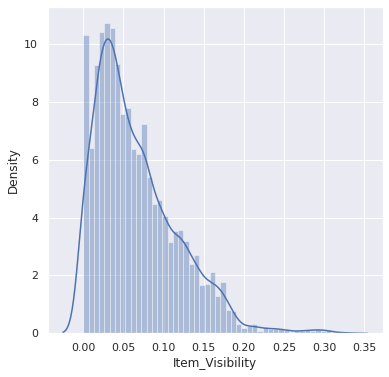

In [191]:
#Item Visibility Ditribution
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_Visibility'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


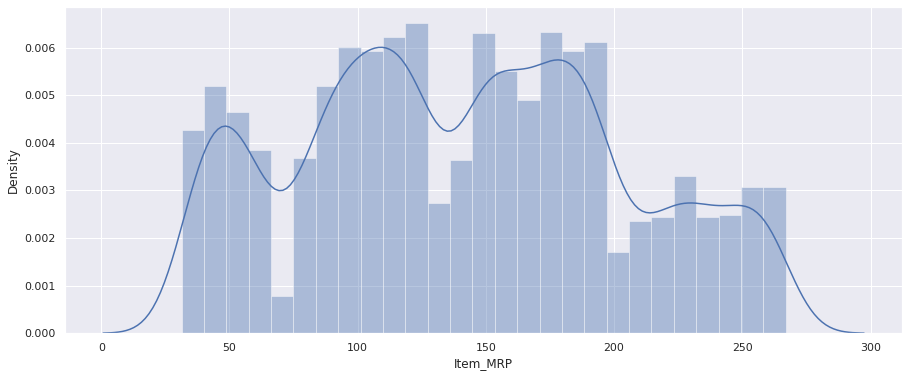

In [193]:
#Item MRP Ditribution
plt.figure(figsize=(15,6))
sns.distplot(big_mart_data['Item_MRP'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


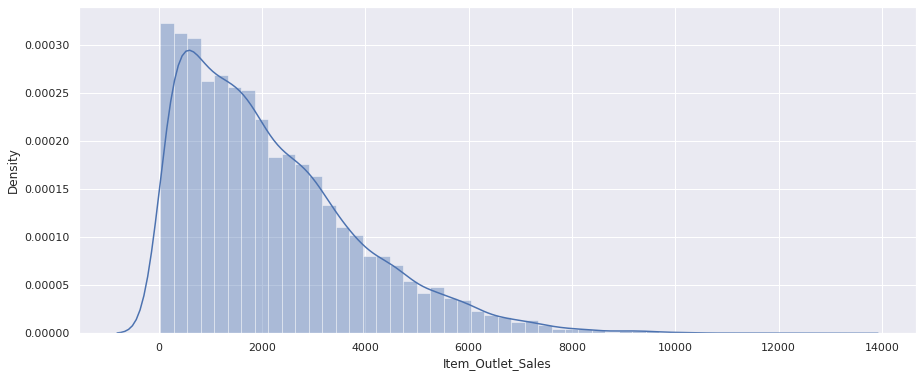

In [194]:
#Item sales Ditribution
plt.figure(figsize=(15,6))
sns.distplot(big_mart_data['Item_Outlet_Sales'])
plt.show()


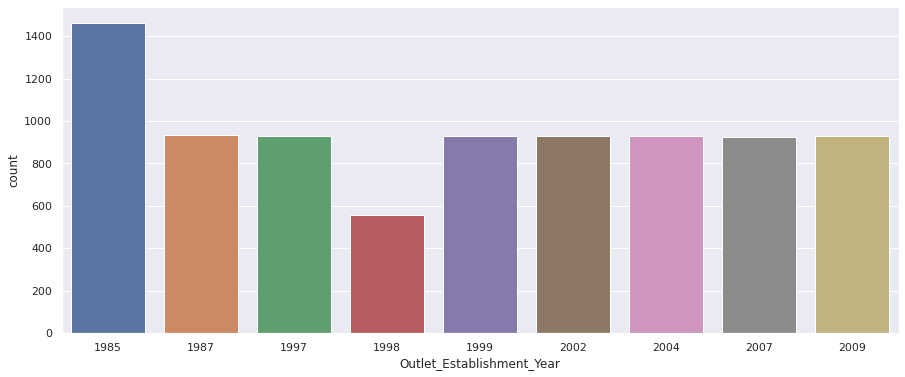

In [195]:
#Item Outlet establishment Ditribution
plt.figure(figsize=(15,6))
sns.countplot(x='Outlet_Establishment_Year',data=big_mart_data)
plt.show()

Categorical Features:
          
Item_Weight                
Item_Fat_Content        
Item_Visibility        
Item_Type                  
Item_MRP               
Outlet_Establishment_Year  
Outlet_Size            
Outlet_Location_Type       
Outlet_Type               
Item_Outlet_Sales     

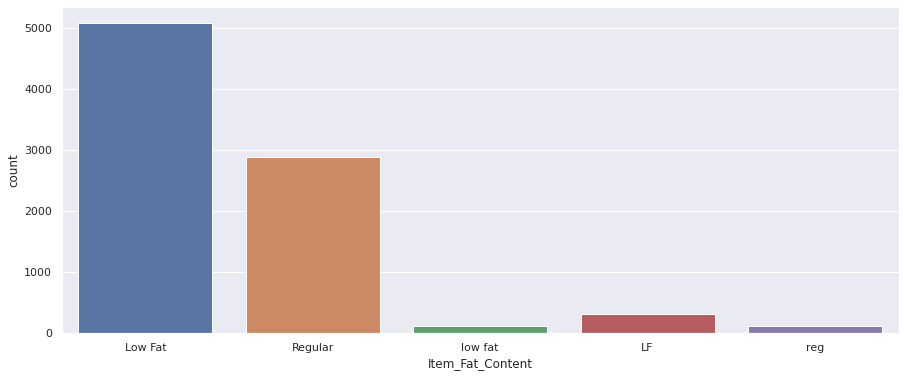

In [196]:
#Item fat content Ditribution
plt.figure(figsize=(15,6))
sns.countplot(x='Item_Fat_Content',data=big_mart_data)
plt.show()

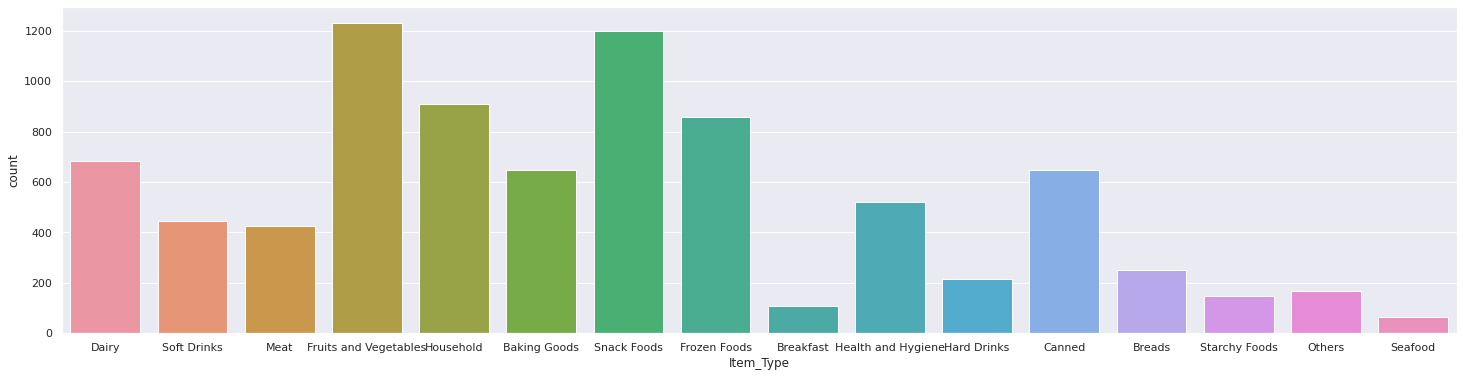

In [197]:
#Item Type content Ditribution
plt.figure(figsize=(25,6))
sns.countplot(x='Item_Type',data=big_mart_data)
plt.show()

Data Pre-processing

In [198]:
big_mart_data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [203]:
big_mart_data.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)


In [202]:
big_mart_data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [204]:
encoder = LabelEncoder()

In [207]:
big_mart_data['Item_Identifier'] = encoder.fit_transform(big_mart_data['Item_Identifier'])

big_mart_data['Item_Fat_Content'] = encoder.fit_transform(big_mart_data['Item_Fat_Content'])

big_mart_data['Item_Type'] = encoder.fit_transform(big_mart_data['Item_Type'])

big_mart_data['Outlet_Identifier'] = encoder.fit_transform(big_mart_data['Outlet_Identifier'])

big_mart_data['Outlet_Size'] = encoder.fit_transform(big_mart_data['Outlet_Size'])

big_mart_data['Outlet_Location_Type'] = encoder.fit_transform(big_mart_data['Outlet_Location_Type'])

big_mart_data['Outlet_Type'] = encoder.fit_transform(big_mart_data['Outlet_Type'])

In [ ]:
big_mart_data.head()

Splitting Features and Targets


In [229]:
X = big_mart_data.drop(columns='Item_Outlet_Sales', axis=1)
Y = big_mart_data['Item_Outlet_Sales']

Splitting our Data into Training data and the Testing Data

In [227]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=2)

In [228]:
print(X.shape, X_train.shape, X_test.shape)

(8523, 11) (7670, 11) (853, 11)


Training of our Machine Learning Model

In [217]:
regressor = XGBRegressor()

In [218]:
regressor.fit(X_train, Y_train)

[07:33:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

Evaluation

In [220]:
# prediction on training data
training_data_prediction = regressor.predict(X_train)

In [222]:
# R squared Value
r2_train = metrics.r2_score(Y_train, training_data_prediction)

In [224]:
print('R Squared value = ', r2_train)

R Squared value =  0.6364457030941357


In [225]:
# prediction on test data
test_data_prediction = regressor.predict(X_test)

In [226]:
# R squared Value
r2_test = metrics.r2_score(Y_test, test_data_prediction)

In [ ]:
print('R Squared value = ', r2_test)